<!-- codsoft task by PB -->

# IRIS FLOWER CLASSIFICATION

<i>The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective pecies. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species. Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal measurements. </i>

# About Dataset

## Context

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

| Variable Name | Role    | Type        | Description                                         | Units |
|---------------|---------|-------------|-----------------------------------------------------|-------|
| sepal length  | Feature | Continuous  | Length of the sepal                                 | cm    |
| sepal width   | Feature | Continuous  | Width of the sepal                                  | cm    |
| petal length  | Feature | Continuous  | Length of the petal                                 | cm    |
| petal width   | Feature | Continuous  | Width of the petal                                  | cm    |
| class         | Target  | Categorical | Class of iris plant: Iris Setosa, Iris Versicolour, or Iris Virginica |       |



## Importing the necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [3]:
df = pd.read_csv("IRIS (1).csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Information about the dataframe

In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking for null/missing values in the dataset

In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Checking for duplicate values

In [9]:
df.duplicated().sum()

np.int64(3)

## dropping the duplicate rows

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

## EDA

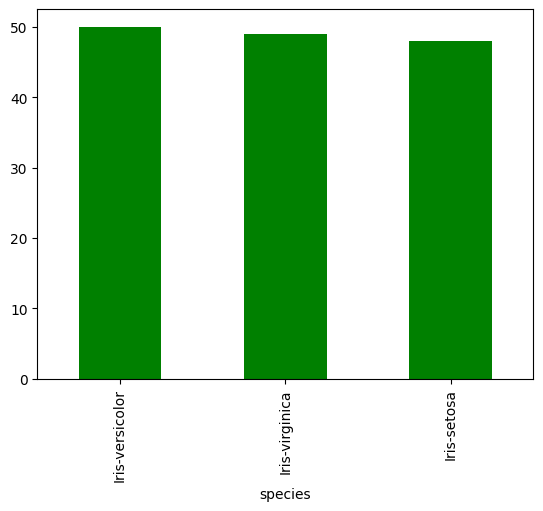

In [12]:
df['species'].value_counts().plot(kind='bar',color='g')
plt.show()

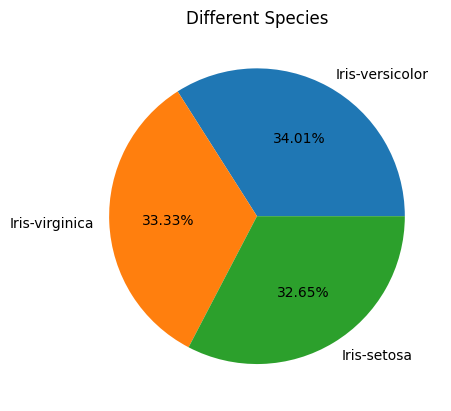

In [13]:
plt.pie(df['species'].value_counts(),labels=df['species'].value_counts().index,autopct="%1.2f%%")
plt.title("Different Species")
plt.show()

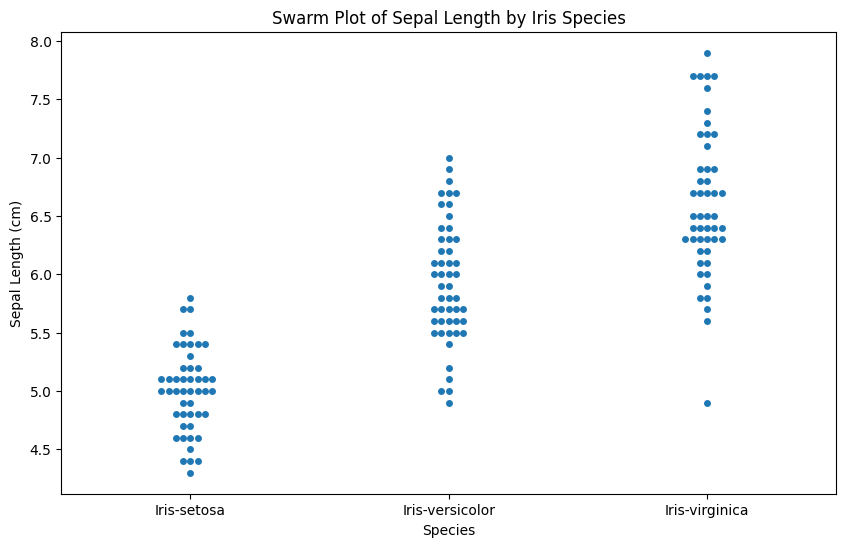

In [14]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x="species", y="sepal_length", data=df)
plt.title("Swarm Plot of Sepal Length by Iris Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.show()

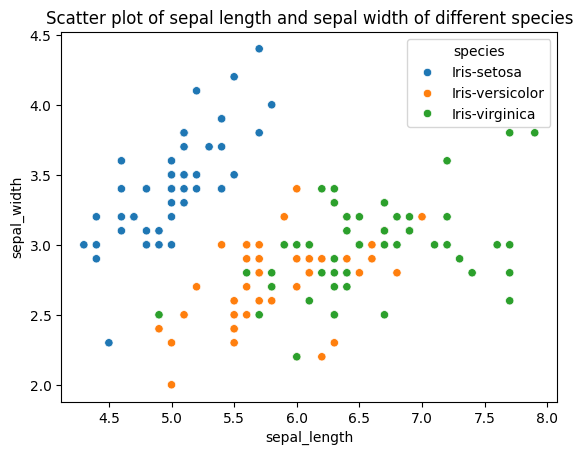

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title("Scatter plot of sepal length and sepal width of different species")
plt.show()

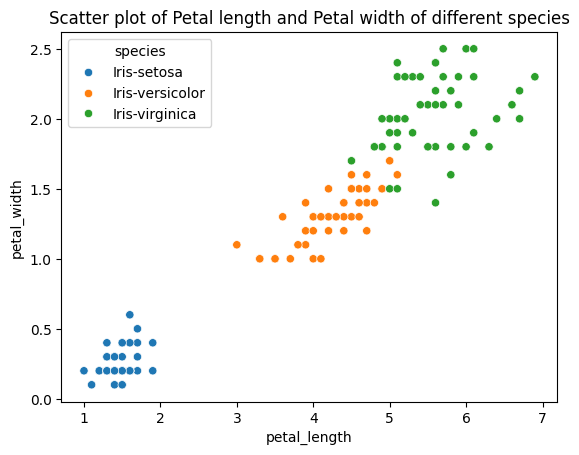

In [16]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.title("Scatter plot of Petal length and Petal width of different species")
plt.show()

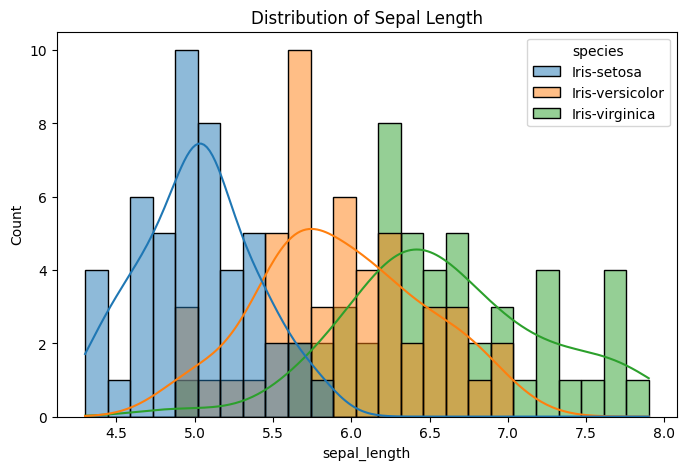

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sepal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Length")
plt.show()

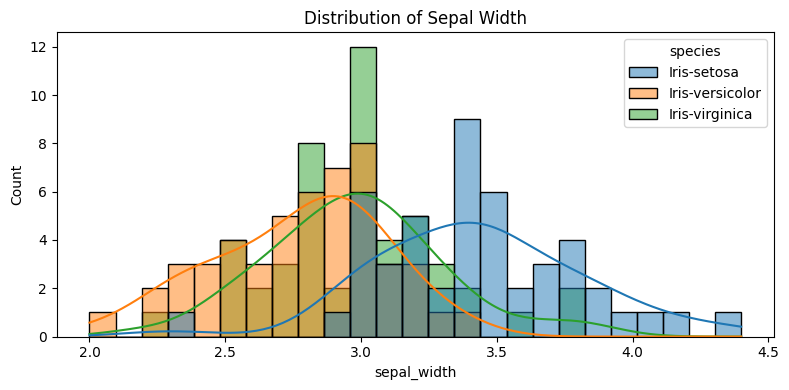

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='sepal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Sepal Width")
plt.tight_layout()
plt.show()

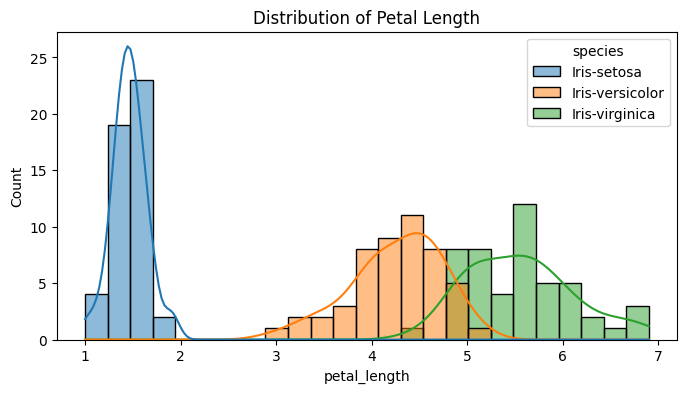

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='petal_length', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Length")
plt.show()

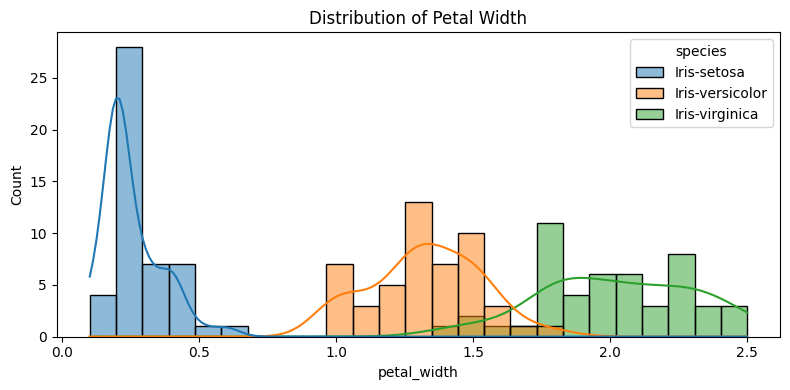

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='petal_width', bins=25,kde=True,hue='species')
plt.title("Distribution of Petal Width")
plt.tight_layout()
plt.show()

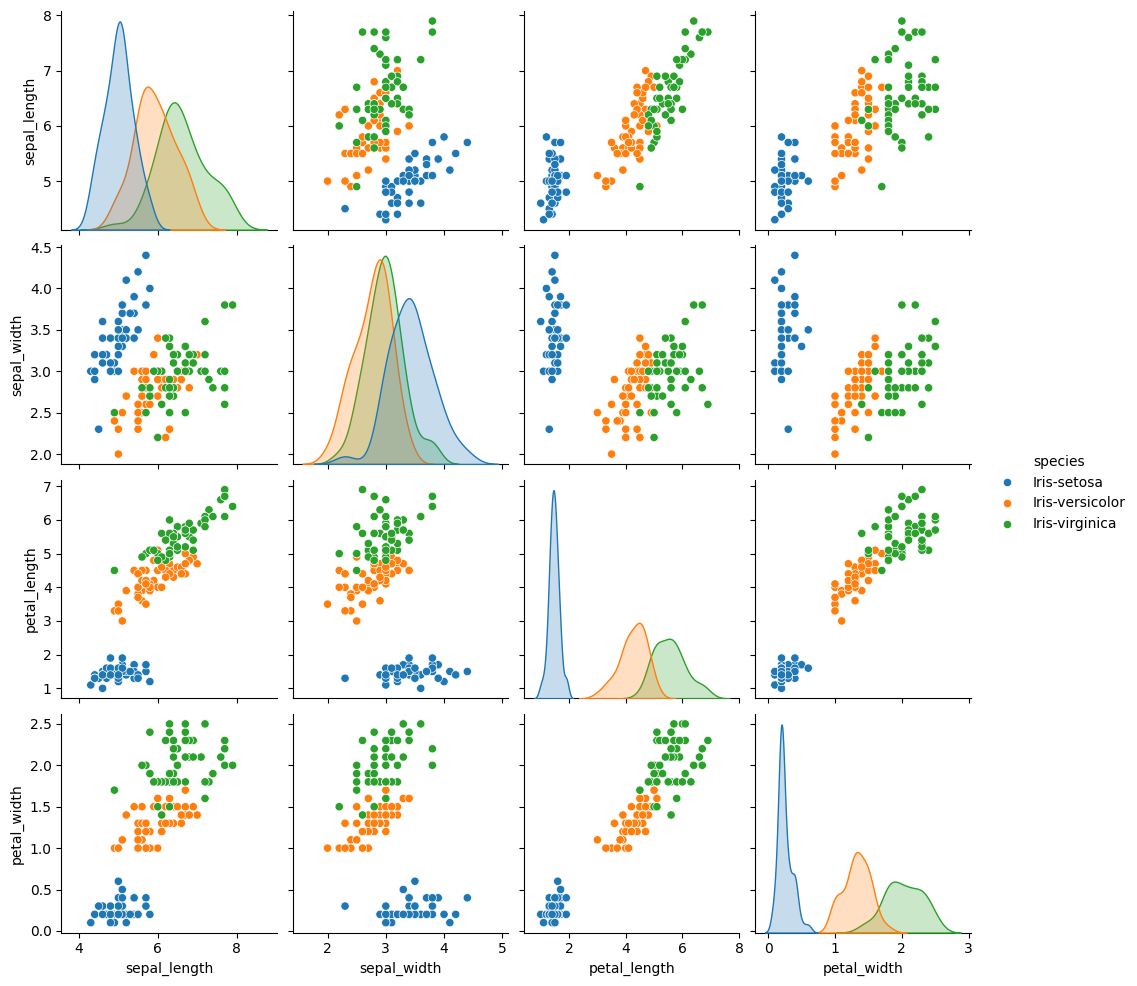

In [21]:
sns.pairplot(df,hue='species')
plt.show()

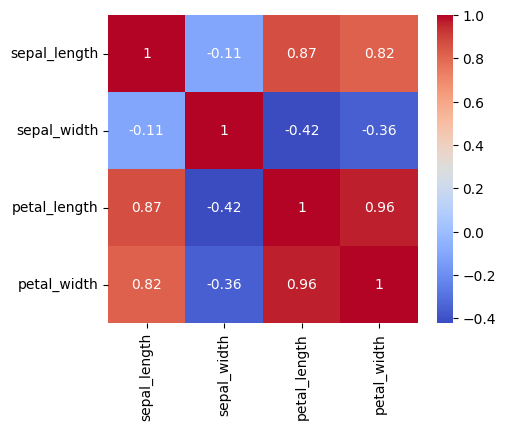

In [22]:
corr=df.corr(numeric_only = True)
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')
plt.show()

# Machine learning

## Checking for outlier

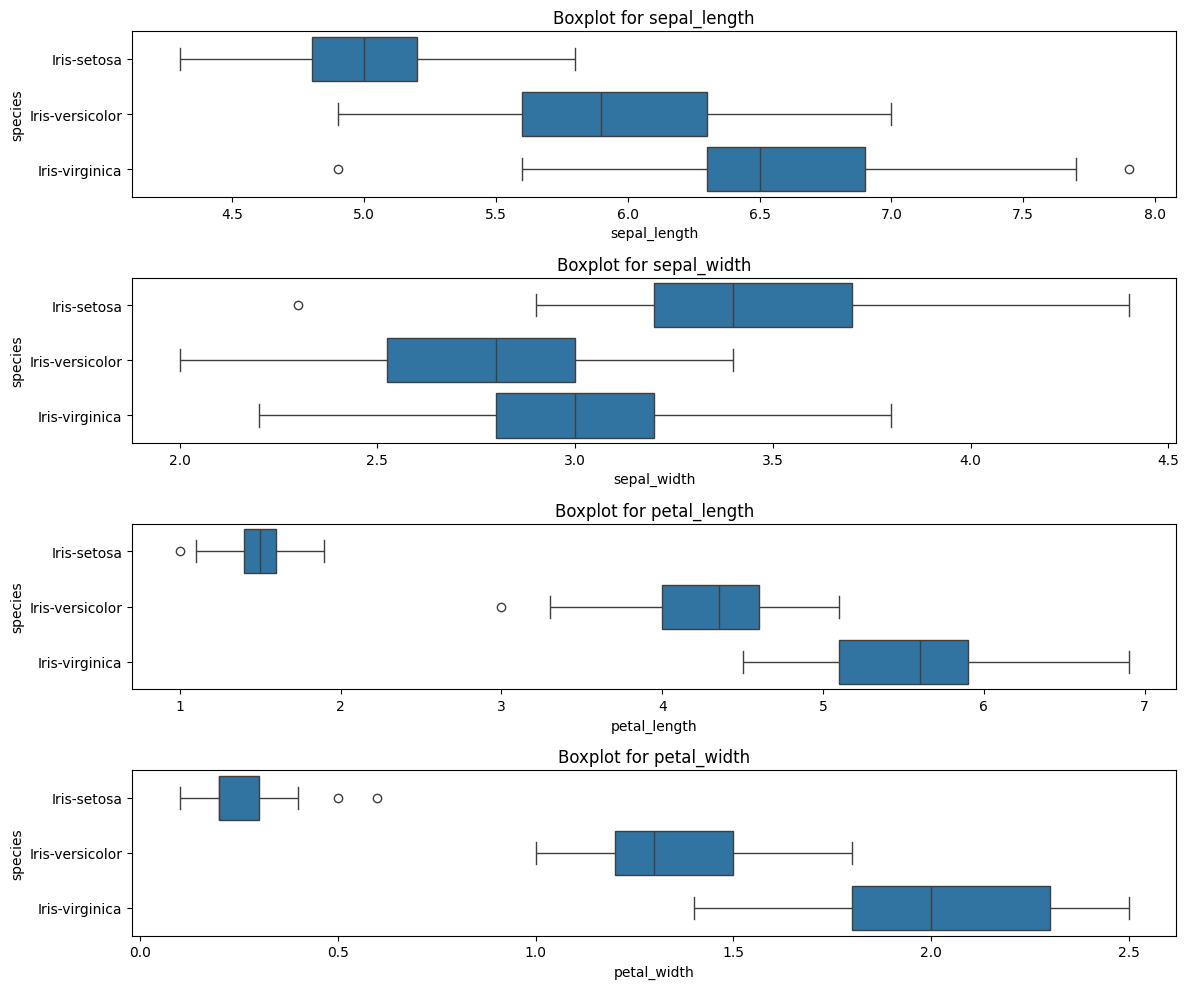

In [23]:
numerical_data = [col for col in df.columns if df.dtypes[col]!='object']
plt.figure(figsize=(12, 10))
for i in range(len(numerical_data)):
    plt.subplot(len(numerical_data),1, i + 1)  
    sns.boxplot(x=numerical_data[i], y='species', data=df)
    plt.title(f'Boxplot for {numerical_data[i]}')
plt.tight_layout()  
plt.show()

## Label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
x = df.drop('species',axis=1)
y = df['species']

In [26]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int64

### Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=1)

## Model building

### Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy score(Logistic Regression):",accuracy*100)

Accuracy score(Logistic Regression): 95.55555555555556


In [32]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Logistic Regression) is:\n', cls_report)

classification report for our model(Logistic Regression) is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Decision tree classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred_dc = dc.predict(x_test)
accuracy_dc = accuracy_score(y_pred_dc, y_test)
print("Accuracy score(Decission Tree classifier):",accuracy_dc*100)
cls_report_dc = classification_report(y_pred_dc, y_test)
print('classification report for our model(Decision tree classifier) is:\n', cls_report_dc)

Accuracy score(Decission Tree classifier): 93.33333333333333
classification report for our model(Decision tree classifier) is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.88      0.91        17
           2       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



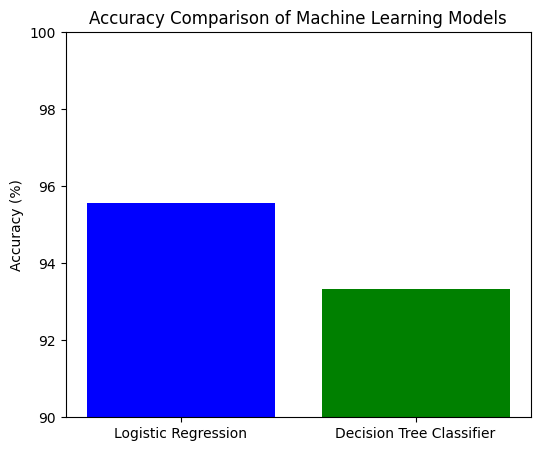

In [34]:
# Model names
models = ['Logistic Regression', 'Decision Tree Classifier']

# Accuracy values
acc = [accuracy*100,accuracy_dc*100]

# Create the bar plot
plt.figure(figsize=(6, 5))
plt.bar(models, acc, color=['blue', 'green'])
plt.ylim(90, 100)  
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison of Machine Learning Models')
plt.show()


# `Conclusion`

In this project, I compared two machine learning algorithms for Iris flower classification:

1. **Logistic Regression**:
    - **Accuracy**: 95.56%

2. **Decision Tree Classifier**:
    - **Accuracy**: 93.33%

Logistic Regression slightly outperformed the Decision Tree Classifier, indicating it was better suited for this dataset. However, both models demonstrated strong performance, confirming the effectiveness of these techniques for Iris flower classification. Future work could explore other advanced algorithms to further improve accuracy.